In [1]:
import importlib
import src.process_data as process_data

In [2]:
# Reimport module when you make changes
importlib.reload(process_data)

<module 'src.process_data' from '/Users/ayushiagrawal/Documents/UofT/2 2T5Summer APS360/image-upscaler/src/process_data.py'>

In [3]:
data_dir = 'data/chestxrays'
process_data.generate_downsampled_pairs(data_dir)

libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


In [4]:
# get data loaders
data_loaders = process_data.get_data_loaders(data_dir)

print("Training data length:", len(data_loaders['train'].dataset))
print("Validation data length:", len(data_loaders['val'].dataset))
print("Test data length:", len(data_loaders['test'].dataset))

print("Sample training LR shape:", data_loaders['train'].dataset[0][0].shape)
print("Sample training HR shape:", data_loaders['train'].dataset[0][1].shape)

print("Sample training batch shape:", next(iter(data_loaders['train']))[0].shape)

Training data length: 841
Validation data length: 239
Test data length: 120
Sample training LR shape: torch.Size([3, 64, 64])
Sample training HR shape: torch.Size([3, 256, 256])
Sample training batch shape: torch.Size([64, 3, 64, 64])


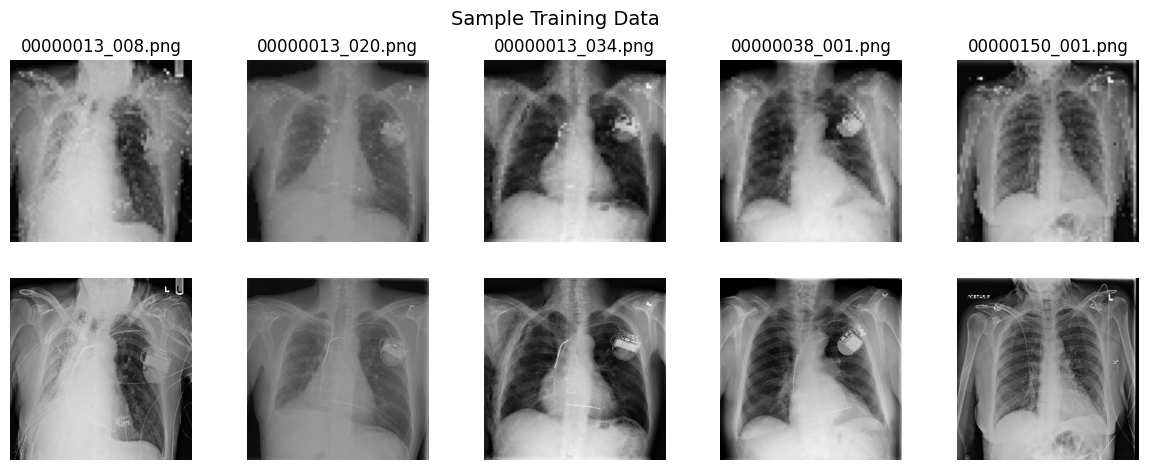

In [17]:
# Visualize some training data
import matplotlib.pyplot as plt
import numpy as np
import os

def visualize_training_data(data_loader, num_images=4):
    import matplotlib.pyplot as plt
    import numpy as np
    import os

    hr_dir = os.path.join(data_dir, "HR_256")
    lr_dir = os.path.join(data_dir, "LR_64")
    filenames = sorted(os.listdir(hr_dir)[:num_images])

    fig, axes = plt.subplots(2, num_images, figsize=(2.5 * num_images, 5))
    if num_images == 1:
        axes = np.expand_dims(axes, axis=1)
    fig.suptitle("Sample Training Data", fontsize=14)

    for i, filename in enumerate(filenames):
        hr_path = os.path.join(hr_dir, filename)
        lr_path = os.path.join(lr_dir, filename)
        if not os.path.exists(hr_path) or not os.path.exists(lr_path):
            continue

        hr_image = plt.imread(hr_path)
        lr_image = plt.imread(lr_path)

        axes[0, i].imshow(lr_image, vmin=0, vmax=255, cmap='gray')
        axes[0, i].set_title(f"{filename}")
        axes[0, i].axis('off')

        axes[1, i].imshow(hr_image, vmin=0, vmax=255, cmap='gray')
        axes[1, i].axis('off')

    plt.subplots_adjust(left=0.05, right=0.98, top=0.88, bottom=0.08, wspace=0.1, hspace=0.2)

visualize_training_data(data_loaders['train'], num_images=5)